# Prerequisite Knowledge: 
* <a href="https://developer.android.com/guide/fragments?gclid=CjwKCAjwoP6LBhBlEiwAvCcthFfzwy4tzJtijJ1cpiCbLtPohU6jXmOZoWfGTL9kjVAISpKZxClJjxoC9WYQAvD_BwE&gclsrc=aw.ds"><b>Fragments</a>
* <a href="https://developer.android.com/reference/kotlin/androidx/viewpager/widget/ViewPager">ViewPager</a>
* <a href="https://developer.android.com/reference/androidx/viewpager/widget/PagerAdapter">PagerAdapter</b></a>


`ViewPager` is a widget(`android.support.v4.view.ViewPager`) that is used to swipe screens horizontally. But we can also use it in the case of vertical screen swiping.

`ViewPager` is mainly used in applications because it provides visual continuity. It keep track of which page is visible and then ask `PagerAdapter` to display the next page in the hierarchy. Not just this, it even allows you to create all sorts of awesome slide effects and animations!

`PagerAdapter` supports data set changes. A data set change may involve pages being added, removed, or changing positions.The usage of a `PagerAdapter` depends on whether you’re dealing with dynamic data or static data. In case a user wants to handle dynamic data, `FragmentStatePagerAdapter` is used whereas `FragmentPagerAdapter` is used for static data.



Here,  we use <a href="https://developer.android.com/training/animation/vp2-migration"><b>ViewPager2,</b></a> Because  `FragmentStatePagerAdapter` and  `FragmentPagerAdapter` are deprecated from API 27, and we are going to see an easy solution to get rid of this problem.

## **Image Resources:**

---



* <a href="https://images.unsplash.com/photo-1543243240-fb18ee7927b3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8MTJ8fHxlbnwwfHx8fA%3D%3D&w=1000&q=80"> Image1 </a>
* <a href="https://cdn.britannica.com/w:400,h:300,c:crop/64/145564-050-BEF0E4DC/Wind-palm-trees-golf-course-Hawaii-Maui.jpg">Image2</a>
* <a href="https://resize.indiatvnews.com/en/resize/newbucket/1200_-/2019/12/14162407261-1576676726.jpg">Image3</a>
* <a href="https://scx2.b-cdn.net/gfx/news/2019/22-conservation.jpg">Image4</a>
* <a href="https://images.unsplash.com/photo-1597801038590-9e3a24bcd6b7?ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8Z3JlZW4lMjBza3l8ZW58MHx8MHx8&ixlib=rb-1.2.1&w=1000&q=80">Image5</a>

**Step 1:** Create a project with an empty activity and rename it with **ScreenSliderActivity**. (This renaming is not mandatory)

**Step 2:** Paste all the external resources into **drawable** folder.

(Rename the layout file also with `activity_slider_screen.xml`)



---


**Step 3:** Create the fragments.


(It is not mandatory to build external fragments here. We can do this with the help of PagerAdapter because PagerAdapter supports data set changes.To see the implementation, <a href="https://www.youtube.com/watch?v=byLKoPgB7yA">Click here</a>)


 * **Step 3.1:**  create a package named container.
 

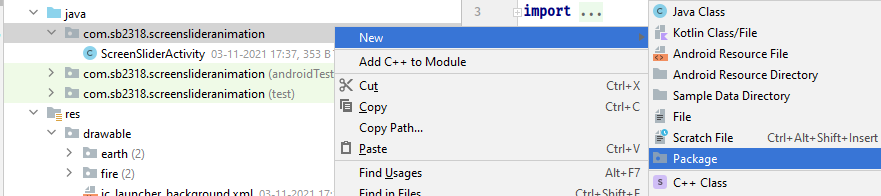



---

 * **Step 3.2:** create five fragments within the package.

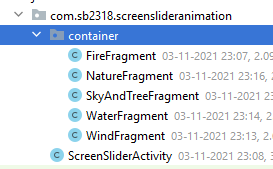



---

 * **Step 3.3 :** Remove all unnecessary methods and fields from fragments. Your fragments look like.


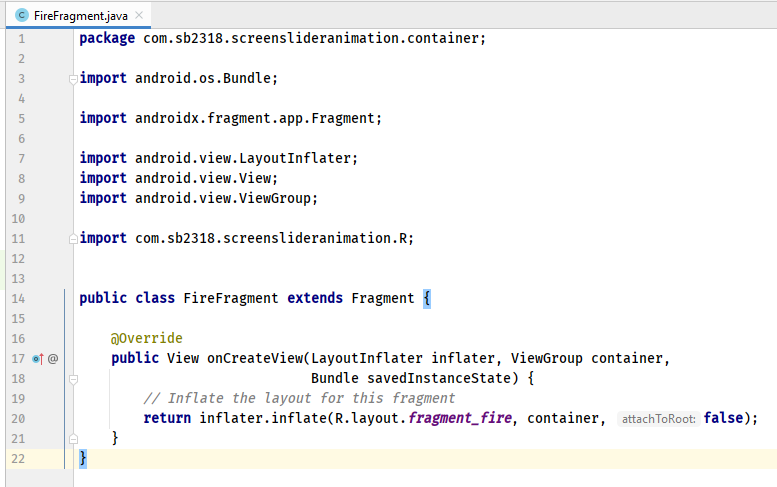



---


**Step 4:** Create the views

We have five fragments here. We will maintain the same design pattern for these five fragments. The change will reflect only on the background and the text of the TextView.

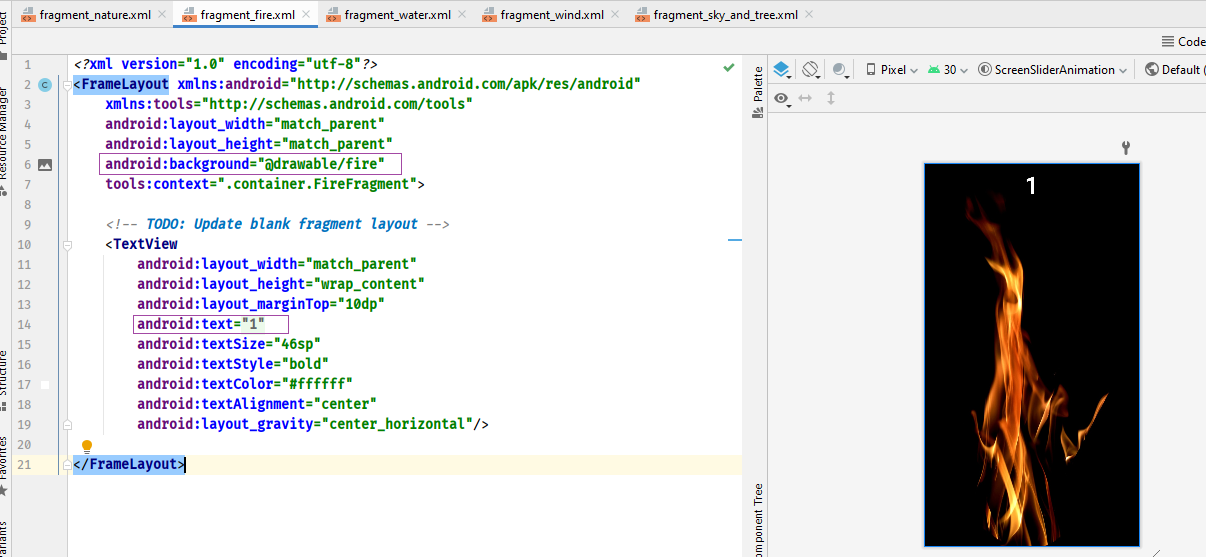



---

**Step 5:** Create ViewPager and set the ViewPager at `activity_slider_screen.xml` and specify it with an Id.

First, let me clarify what I want to do.
I want to take a ViewPager over the `activity_slider_screen` layout. The view pager will cover the whole screen here. Then I will apply those five fragments to the view pager.

Let's see the step-by-step process to implement it.

**Step 5.1 :** First open the layout(xml file) and remove the default TextView.

**Step 5.2 :** Create a ViewPager2 view inside the parent layout.

`androidx.viewpager2.widget.ViewPager2`

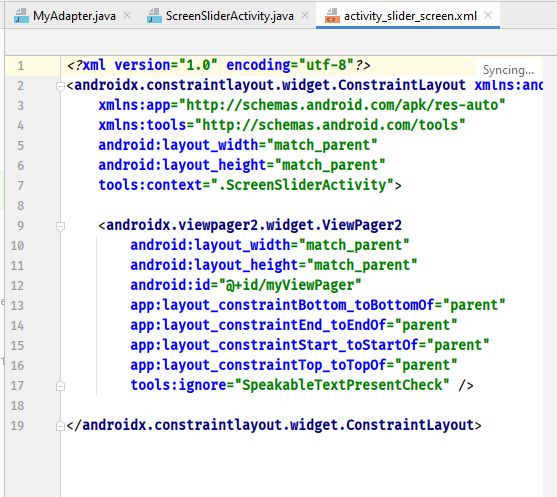



---
**Step 6:**  Create an adapter class which extends <a href="https://developer.android.com/reference/androidx/viewpager2/adapter/FragmentStateAdapter"><b>FragmentStateAdapter</b></a> instead of extending `FragmentStatePagerAdapter` and override the required methods.


In [ ]:
package com.sb2318.screenslideranimation.adapter;

import androidx.annotation.NonNull;
import androidx.fragment.app.Fragment;
import androidx.fragment.app.FragmentActivity;
import androidx.viewpager2.adapter.FragmentStateAdapter;

import com.sb2318.screenslideranimation.container.FireFragment;
import com.sb2318.screenslideranimation.container.NatureFragment;
import com.sb2318.screenslideranimation.container.SkyAndTreeFragment;
import com.sb2318.screenslideranimation.container.WaterFragment;
import com.sb2318.screenslideranimation.container.WindFragment;

public class MyAdapter extends FragmentStateAdapter {


    public MyAdapter(@NonNull FragmentActivity fragmentActivity) {
        super(fragmentActivity);
    }

    @NonNull
    @Override
    public Fragment createFragment(int position) {

        switch(position){

            case 0:
                return new FireFragment();

            case 1:
                return new WindFragment();

            case 2:
                return new WaterFragment();

            case 3:
                return new NatureFragment();

            case 4:
                return new SkyAndTreeFragment();
        }

        // default cases
        return new FireFragment();
    }

    @Override
    public int getItemCount() {
        // The number of fragments you needed
        return 5;
    }
}




---
**Step 7:** Go to `ScreenSliderActivity` and find `ViewPager2`.

**Step 8:** Instantiate the **Adapter** class you created before, and set the adapter object into `ViewPager2`.


In [ ]:
package com.sb2318.screenslideranimation;

import android.os.Bundle;

import androidx.appcompat.app.AppCompatActivity;
import androidx.viewpager2.widget.ViewPager2;

import com.sb2318.screenslideranimation.adapter.MyAdapter;

public class ScreenSliderActivity extends AppCompatActivity {

    private ViewPager2 mSildeViewPager;

    private MyAdapter myAdapter;
    @Override
    protected void onCreate(Bundle savedInstanceState) {
        super.onCreate(savedInstanceState);
        setContentView(R.layout.activity_slider_screen);

        // Hide the action bar
        getSupportActionBar().hide();
        mSildeViewPager= findViewById(R.id.myViewPager);

        myAdapter = new MyAdapter(this);

        mSildeViewPager.setAdapter(myAdapter);

    }
}



---


**Step 9:** Apply animation between fragments using PageTransformer. Here we use **Zoom-out page transformer.**

* **Step 9.1 :** Create a new Java class copy the code from here.

In [ ]:
 package com.sb2318.screenslideranimation.pageTransformer;

import android.view.View;

import androidx.viewpager2.widget.ViewPager2;

public class ZoomOutPageTransformer implements ViewPager2.PageTransformer {
    private static final float MIN_SCALE = 0.85f;
    private static final float MIN_ALPHA = 0.5f;

    public void transformPage(View view, float position) {
        int pageWidth = view.getWidth();
        int pageHeight = view.getHeight();

        if (position < -1) { // [-Infinity,-1)
            // This page is way off-screen to the left.
            view.setAlpha(0f);

        } else if (position <= 1) { // [-1,1]
            // Modify the default slide transition to shrink the page as well
            float scaleFactor = Math.max(MIN_SCALE, 1 - Math.abs(position));
            float vertMargin = pageHeight * (1 - scaleFactor) / 2;
            float horzMargin = pageWidth * (1 - scaleFactor) / 2;
            if (position < 0) {
                view.setTranslationX(horzMargin - vertMargin / 2);
            } else {
                view.setTranslationX(-horzMargin + vertMargin / 2);
            }

            // Scale the page down (between MIN_SCALE and 1)
            view.setScaleX(scaleFactor);
            view.setScaleY(scaleFactor);

            // Fade the page relative to its size.
            view.setAlpha(MIN_ALPHA +
                    (scaleFactor - MIN_SCALE) /
                            (1 - MIN_SCALE) * (1 - MIN_ALPHA));

        } else { // (1,+Infinity]
            // This page is way off-screen to the right.
            view.setAlpha(0f);
        }
    }
}


* **Step 9.2 :** Set the **PageTransformer** with the ViewPager object of ScreenSliderActivity (Add these two lines of code inside the onCreate() method of the activity.)

In [ ]:

       // Set PageTransformer
        mSildeViewPager.setPageTransformer(new ZoomOutPageTransformer());


**Step 10:** Run your application.

**(We are using python code just for gif uploading.)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

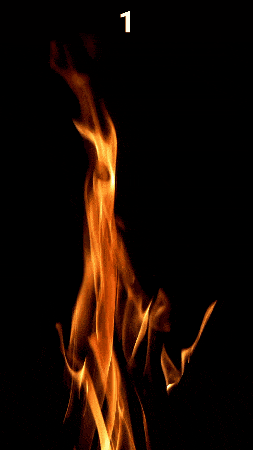

In [13]:
gifPath = "/content/drive/MyDrive/final2.gif"
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')